## TESLA Stock Analysis

In [106]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [107]:
import  warnings
warnings.filterwarnings("ignore", category= FutureWarning)

In [108]:
tesla= yf.Ticker("TSLA")

In [109]:
tesla_data = tesla.history(period ="max")

In [110]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head(5))

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [111]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
import requests
html_data = requests.get(url)
html_data

<Response [200]>

In [112]:
soup = BeautifulSoup(html_data.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

In [113]:
tables = soup.find_all("table")


tesla_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table = table
        break

rows = []

if tesla_table is not None:
    for row in tesla_table.find_all('tr')[1:]:  
        cols = row.find_all("td")
        if len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')

            rows.append({"Date": date, "Revenue": revenue})


tesla_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])

print(tesla_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

In [114]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [115]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [116]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

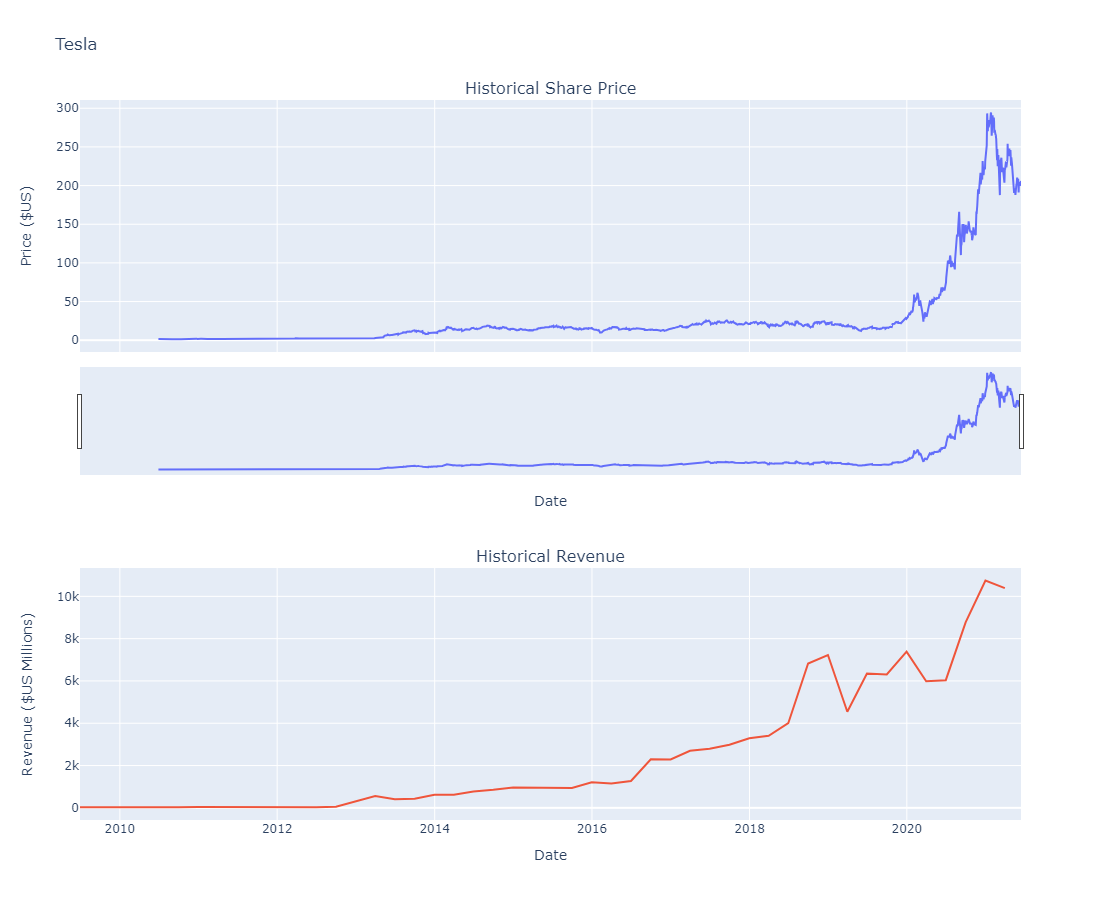

In [117]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## GME Stock Analysis

In [118]:
gme= yf.Ticker("GME")

In [119]:
gme_data = gme.history(period = "max")
print(gme_data)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620129   1.693350   1.603296   1.691667   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658001   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2024-07-15 00:00:00-04:00  25.980000  27.200001  25.650000  27.000000   
2024-07-16 00:00:00-04:00  27.750000  28.830000  27.370001  28.540001   
2024-07-17 00:00:00-04:00  28.400000  29.790001  27.240000  27.980000   
2024-07-18 00:00:00-04:00  27.980000  28.379999  25.610001  25.879999   
2024-07-19 00:00:00-04:00  25.549999  26.389999  24.850000  24.969999   

                             Volume  Dividends  St

In [120]:
gme_data.reset_index(inplace=True)
print(gme_data.head(5))

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [121]:
import requests
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

data= requests.get(url).text
data

'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src=

In [122]:
soup= BeautifulSoup(data, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

In [123]:
tabels = soup.find_all("tabels")

gme_tabel= None
for tabel in tabels:
    if "GameStop Revenue" in tabel.text:
        gme_tabel= tabel
        break


if gme_tabel is not None:
    for row in gme_tabel.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols)>= 2:
            date= cols[0].text.strip
            revenue= cols[1].text.strip.replace(',' , ' ').replace('$', ' ')
            rows.append({'Date': date, 'Revenue': revenue})

gme_revenue= pd.DataFrame(rows, columns= ["Date", "Revenue"])
                          
print(gme_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

In [124]:
gme_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27
